# Functions

## 1. Document Dr. X's function with comments and with markdown


 The code has a path to a FASTA file (fasta_fn: str). The return is a dictionary that is keyed by the species name. The values are Bio.Seq.Seq. objects that represent the sequence for each species. 

In [4]:
##code from Dr. X

def get_sequences_from_file(fasta_fn): ##fasta_fn is a path to the FASTA file
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split() ##split the info to extract and store in description
        species_name = description[1] + " " + description[2]  ##extracting information from the record.description to code speices name
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

The following script uses the code provided from Dr. X to extract sequence data that is keyed by the species name. Then I used get_sequences_from_file that was defined and input the fasta file name provided. The print function prints this to the screen where I can see the sequences associated with each penguin species. 

In [5]:
##Here is code that reads the fasta file penguins_cytb.fasta
##returns a dictionary of sequences that is keyed by the corresponding penguin sequence

from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

def get_sequences_from_file(fasta_fn): ##using code from Dr. X
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split() 
        species_name = description[1] + " " + description[2]  
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

penguin_sequences = get_sequences_from_file("penguins_cytb.fasta")
print(penguin_sequences)

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'), 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'), 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'), 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'), 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'), 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'), 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'), 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAAC

## 2. Write a function that translates sequences

Each code for each species of penguin is listed with its correspodning translated sequence. Using "for record in SeqI0.parse" the FASTA file can be read one entry at a time and then produce a SeqRecord object. This can then be converted to a string of nucleotides with the function dna_seq = str(record.seq). translated_seq = translate_fasta_sequence("penguins_cytb.fasta") provides the fasta file to obtain the species name and extract the sequence 


In [6]:
from Bio.Data import CodonTable

def translate_standard(seq: str) -> str: ##I used standard because I was having issues running code without
    
    seq = seq.upper()
    table = CodonTable.unambiguous_dna_by_name["Standard"]
    aa_seq = []
    for p in range(0, len(seq) - 2, 3):
        codon = seq[p:p+3]
        if codon in table.stop_codons: ##if identifies a missing field or stop codon, it will stop translating
            break
        aa_seq.append(table.forward_table.get(codon, "X"))
    return "".join(aa_seq)

In [30]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
from typing import Dict #used this because if I wrote the word 'Dict' without defining caused error

def translate_fasta_sequence(fasta_fn: str) -> Dict[str, str]:
    
    translated_seq: Dict[str, str] = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        dna_seq = str(record.seq)
        protein = translate_standard(dna_seq)
        translated_seq[record.id] = protein
    return translated_seq

translated_seq = translate_fasta_sequence("penguins_cytb.fasta")  ##provided the fasta file I want to extract sequences from
for species_id, aa_seq in translated_seq.items():
    print(f"{species_id}\t{aa_seq}")

AB026282	MAPNLRKSHPLLKIINNSLIDLPTPSNISA
AF076044	MAPNLRKSHPLLKIINNSLIDLPTPSNISA
AF076051	MAPNLRKSHPLLKTINNSLIDLPTPSNISA
AF076052	MAPNLRKSHPLLKTINNSLIDLPTPSNISA
AB026277	MAPNLRKSHPLLKTINNSLIDLPTPSNISA
AB026278	MAPNLRKSHPLLKIINNSLIDLPTPSNIST
AB066603	MAPNLRKSHPLLKIINNSLIDLPTPSNISA
AF076089	MAPNLRKSHPLLKIINNSLIDLPTPSNISA
AF076090	MAPNLRKSHPLLKIINKSLIDLPTPPNISA
AB026269	MAPNLRKSHPLLKTINNSLIDLPTPSNISA
AB026271	MAPNLRKSHPLLKTINNSLIDLPTPSNISA
AB026270	MAPNLRKSHPLLKTINNSLIDLPTPSNISA


## 3. Alternative function that translates sequences

This defines translate_sequence and uses the standard translational method that stops at the first stop codon. The script reads the fasta file and uses Seq that is imported from Bio.Seq allowing for faster read of data. 

In [21]:
from Bio.Seq import Seq ##Seq(seq).translate allows me to use stop=True for a faster read 
from Bio import SeqIO
from typing import Dict

def translate_sequence(seq: str,
                       table: str = "Standard") -> str:
    return str(Seq(seq).translate(table=table, to_stop=True))


def translate_fasta_biopython(fasta_fn: str,
                              table: str = "Standard"
                             ) -> Dict[str, str]:
    out: Dict[str, str] = {}
    for rec in SeqIO.parse(fasta_fn, "fasta"):
        out[rec.id] = translate_sequence(str(rec.seq), table=table)
    return out

if __name__ == "__main__":
    
    prot_dict = translate_fasta_biopython("penguins_cytb.fasta")
    for rid, protein in prot_dict.items():
        print(f"{rid}\t{protein}") ##prints each species code and the correspodning amino acid sequence a tab over

AB026282	MAPNLRKSHPLLKIINNSLIDLPTPSNISA
AF076044	MAPNLRKSHPLLKIINNSLIDLPTPSNISA
AF076051	MAPNLRKSHPLLKTINNSLIDLPTPSNISA
AF076052	MAPNLRKSHPLLKTINNSLIDLPTPSNISA
AB026277	MAPNLRKSHPLLKTINNSLIDLPTPSNISA
AB026278	MAPNLRKSHPLLKIINNSLIDLPTPSNIST
AB066603	MAPNLRKSHPLLKIINNSLIDLPTPSNISA
AF076089	MAPNLRKSHPLLKIINNSLIDLPTPSNISA
AF076090	MAPNLRKSHPLLKIINKSLIDLPTPPNISA
AB026269	MAPNLRKSHPLLKTINNSLIDLPTPSNISA
AB026271	MAPNLRKSHPLLKTINNSLIDLPTPSNISA
AB026270	MAPNLRKSHPLLKTINNSLIDLPTPSNISA


##  4. Calculate the molecular weight of each amino acid sequence

The following code shows how to compute the molecular weight. Then using the provided fasta file, SeqI0 is used to translate the sequences. 

In [8]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def compute_molecular_weight(aa_seq: str) -> float:
   
    seq_str = aa_seq.replace("*", "") #removes stop codon markers
    analysis = ProteinAnalysis(seq_str)
    return analysis.molecular_weight()

In [25]:
##computing molecular weight of penguin data

from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis

for record in SeqIO.parse("penguins_cytb.fasta", "fasta"): ##uses SeqI0 SeqRecord for translation
    protein = record.seq.translate(table="Standard", to_stop=True)  
    mw = ProteinAnalysis(str(protein)).molecular_weight()
    print(f"{record.id}\t{mw:.2f} Da")

AB026282	3268.83 Da
AF076044	3268.83 Da
AF076051	3256.77 Da
AF076052	3256.77 Da
AB026277	3256.77 Da
AB026278	3298.85 Da
AB066603	3268.83 Da
AF076089	3268.83 Da
AF076090	3292.93 Da
AB026269	3256.77 Da
AB026271	3256.77 Da
AB026270	3256.77 Da


## 5. Calculate the GC-content

GC-count is a fraction of the percentage of G and C bases compared to the entire sequence length. For the script, the length of DNA was calaculated and the count (in decimal form) was computed of GC content. Then using the provided fasta file, I used my script to extract data from the sequences and printed my computed GC count to the screen. 

In [9]:
def gc_content(seq: str) -> float:
    dna_seq = seq.upper()
    length = len(dna_seq)
    if length == 0:
        return 0.0
    gc_count = seq.count('G') + seq.count('C')
    return gc_count / length ##calculates gc as a fraction not an integer 

from Bio import SeqIO

for record in SeqIO.parse("penguins_cytb.fasta", "fasta"):
    gc_fraction = gc_content(str(record.seq))
    print(f"{record.id}\t{gc_fraction:.3f}")

AB026282	0.484
AF076044	0.497
AF076051	0.512
AF076052	0.509
AB026277	0.508
AB026278	0.493
AB066603	0.491
AF076089	0.478
AF076090	0.472
AB026269	0.483
AB026271	0.493
AB026270	0.482


# Main

## 6.  Prepare code for new columns to the penguin DataFrame: (1) molecular weight and (2) GC content

The following code uses numpy to obtain access to its "Not a Number" value which is np.nan. This will replace the fields in which there are empty cells and fill it with a recognizable value. 

In [10]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv") 
species_list = list(penguins_df.species)

In [12]:
import numpy as np

penguins_df['molecular_weight'] = np.nan #this code renames the empty cells to NaN
penguins_df['gc_content']       = np.nan

## 7. For-loop that translates each sequence and also gets molecular weight and computes the GC content

This code computed the molecular weight and gc content and then adds back to the data frame. 

In [14]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

for e, species in enumerate(species_list):
    dna_seq = cytb_seqs.get(species)
    if dna_seq is None: ##it now knows this because we replaced the fields with np.nan
        continue

    aa_seq = translate_standard(str(dna_seq)) #stops translating at first stop codon (standard)
    mw = ProteinAnalysis(aa_seq).molecular_weight() ##calculates molecular weight
    gc = gc_content(str(dna_seq)) #calculates GC content

    penguins_df.loc[e, 'molecular_weight'] = mw ##these two functions write the code back to the data frame
    penguins_df.loc[e, 'gc_content']       = gc

## 8. Bar-chart of the mass 

Before starting the script for graphs, I first confirmed the column names in the data frame so I could properly extract data for the creation of graphs. I used the library matplotlip.pyplot and imported it as plt to create all of my graphs. This library allows me to easily graph and importing the library as plt allows the script to be shorter and cleaner.  

In [15]:
##confirms names of columns for use in plotting

print(penguins_df.columns)

Index(['species', 'mass', 'molecular_weight', 'gc_content'], dtype='object')


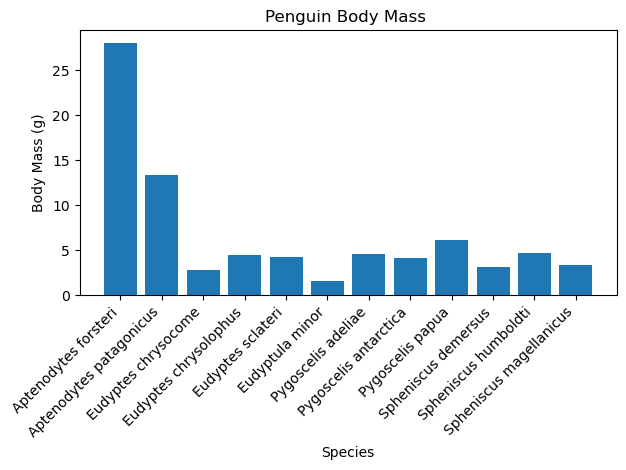

In [57]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(penguins_df['species'], penguins_df['mass'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.title('Penguin Body Mass ')
plt.tight_layout()
plt.show()

## *Q1* What is the smallest penguin species? 
## *Q2* What is the geographical range of this species?

1. The smallest penguin species in terms of body mass is the Eudyptula minor also known is "Little Penguin". 
2. The Little Penguin can be found on the southern coast of Australia and as far as the coast of New South Wales. This penguin can also be found in New Zealand (Hoskins, et al., 2008).

Hoskins, A., P. Dann, Y. Ropert-Coudert, A. Kato, A. Chiaradia, D. Costa, J. Arnould. 2008. Foraging behaviour and habitat selection of the little penguin Eudyptula minor during early chick rearing in Bass Strait, Australia. Marine Ecology-Progress Series, 366: 293-303.

https://animaldiversity.org/accounts/Eudyptula_minor/#geographic_range 

## 9. Visualization of the molecular weight as a function of GC-content

This graph depicts a scatterplot (used plt.scatter) of the molecular weight as a function of GC content. Once again, I used the matplotlib.pyplot library.

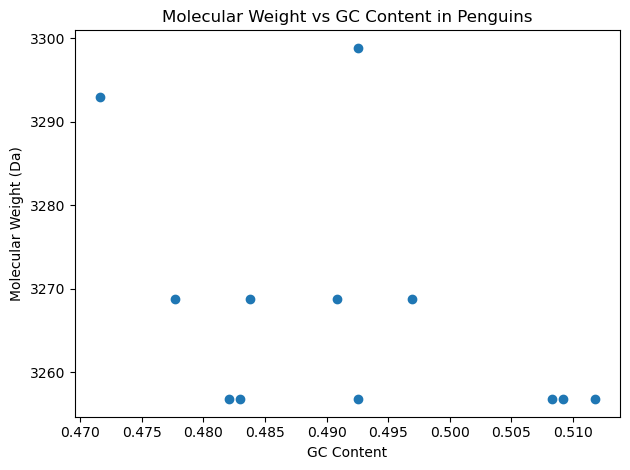

In [17]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

for e, species in enumerate(species_list):
    dna_seq = cytb_seqs.get(species)
    if dna_seq is None:
        continue
    aa_seq = translate_standard(str(dna_seq)) ##stops at first stop-codon
    mw = ProteinAnalysis(aa_seq).molecular_weight() ##computes molecular weight
    gc = gc_content(str(dna_seq))

    penguins_df.loc[e, 'molecular_weight'] = mw
    penguins_df.loc[e, 'gc_content']       = gc

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(penguins_df['gc_content'], penguins_df['molecular_weight'])
plt.xlabel('GC Content')
plt.ylabel('Molecular Weight (Da)')
plt.title('Molecular Weight vs GC Content in Penguins')
plt.tight_layout()
plt.show()

## 10. Save the new DataFrame to a file called "penguins_mass_cytb.csv"

In [63]:
penguins_df.to_csv("penguins_mass_cytb.csv", index=False) ##makes a file and saves to the directory

## 11. BONUS: Calculating Pearson r

The graph depicts a correlation graph to see if there is a relationship between the molecular weight and the GC content of the sequences from each penguin species. Different from the graph above, the pearson r value the code has calculated is -.43 indicating there is a low negative correltation between the molecular weight and the GC content. 

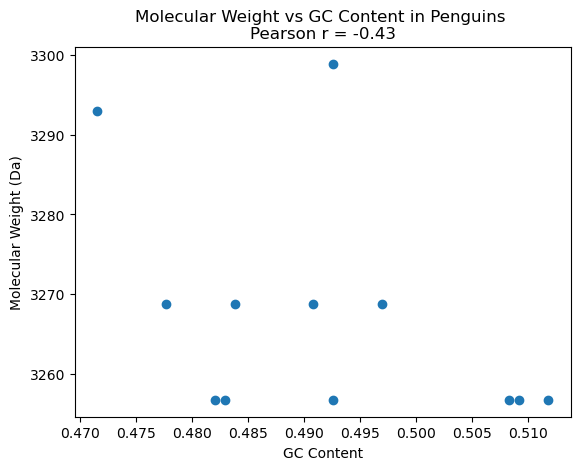

In [20]:
import matplotlib.pyplot as plt

r = penguins_df['gc_content'].corr(penguins_df['molecular_weight'])

plt.figure()
plt.scatter(penguins_df['gc_content'], penguins_df['molecular_weight'])
plt.xlabel('GC Content')
plt.ylabel('Molecular Weight (Da)')
plt.title(f'Molecular Weight vs GC Content in Penguins \nPearson r = {r:.2f}')
plt.show()